In [45]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<img src="images/image8.jpeg" width="600" height="400" />

### Simulation of a Common Cause (Fork)

We simulate a scenario where a common cause \( Z \) influences variables \( X \) and \( Y \). Both \( X \) and \( Y \) exhibit additional random variation independent of \( Z \).

#### Simulation Details

- **\( Z \) Generation**: Simulated as a binary variable (0 or 1).
- **\( X \) and \( Y \) Generation**: Based on \( Z \), using random Bernoulli trials with additional independent randomness.

#### Contingency Table Example

- \( X \) and \( Y \) take binary values (0 or 1).
- Most common pairs: \( (0, 0) \) and \( (1, 1) \), influenced by \( Z \).

#### Correlation Analysis

- **Total Sample**: \( X \) and \( Y \) show a correlation of 0.63, indicating \( Z \)'s influence.
- **Within \( Z \) Levels**: 
  - \( X \) and \( Y \) show no correlation within \( Z \) subsets (0 or 1).
  - Reflects independence after accounting for marginal totals.

#### Conclusion

- This simulation illustrates how \( Z \) acts as a common cause inducing correlation between \( X \) and \( Y \).
- Within specific \( Z \) categories, \( X \) and \( Y \) demonstrate independence, exemplifying the fork in causal inference.

In [46]:
from scipy.stats import bernoulli

n = 1000
np.random.seed(42)

bernoulli_df = pd.DataFrame()

# Generate Z from a Bernoulli distribution with probability 0.5
Z = bernoulli.rvs(0.5, size=n)
bernoulli_df["Z"] = Z

# Generate X based on the values of Z
bernoulli_df["X"] = bernoulli.rvs((1 - Z) * 0.1 + Z * 0.9)

# Generate Y based on the values of Z
bernoulli_df["Y"] = bernoulli.rvs((1 - Z) * 0.1 + Z * 0.9)

corr = bernoulli_df.corr(method="pearson").abs()
print(f"Correlation between X and Y: {corr['X']['Y']: 0.3f}")

corr = bernoulli_df.loc[bernoulli_df['Z'] == 0].corr().abs()
print(f"Correlation between X and Y when Z is 0: {corr['X']['Y']: 0.3f}")

corr = bernoulli_df.loc[bernoulli_df['Z'] == 1].corr().abs()
print(f"Correlation between X and Y when Z is 1: {corr['X']['Y'] : 0.3f}")

Correlation between X and Y:  0.660
Correlation between X and Y when Z is 0:  0.079
Correlation between X and Y when Z is 1:  0.017


<img src="images/image9.jpeg" width="800" height="400" />

### Continuous Example of the Fork

Many find it easier to conceptualize these concepts with continuous data, where visualizations are clearer. Here, we simulate a scenario akin to the fork with 300 examples.

#### Simulation Details

- We simulate a common cause \( Z \) and then generate random normal variables \( X \) and \( Y \), where their values are influenced by \( Z \). Specifically, \( X \) and \( Y \) are larger when \( Z = 1 \) and smaller when \( Z = 0 \).

#### Regression Lines

- Three regression lines are fitted:
  - Black line: Represents the regression line for the total sample, ignoring \( Z \). It shows a clear association where knowing \( X \) helps predict \( Y \).
  - Red line: Regression line for data where \( Z = 1 \). It is horizontal, indicating no association between \( X \) and \( Y \) within this subset.
  - Blue line: Regression line for data where \( Z = 0 \). Similarly, it is horizontal, indicating no association within this subset.

#### Interpretation

- The fork phenomenon: While the black line suggests an association between \( X \) and \( Y \) in the total sample, stratifying by \( Z \) (conditioning on the common cause) reveals no association within each \( Z \) level. This exemplifies how a common cause induces an apparent association between variables, which disappears when accounting for that common cause.


Correlation between X and Y:  0.490
Correlation between X and Y when Z is 0:  0.138
Correlation between X and Y when Z is 1:  0.086


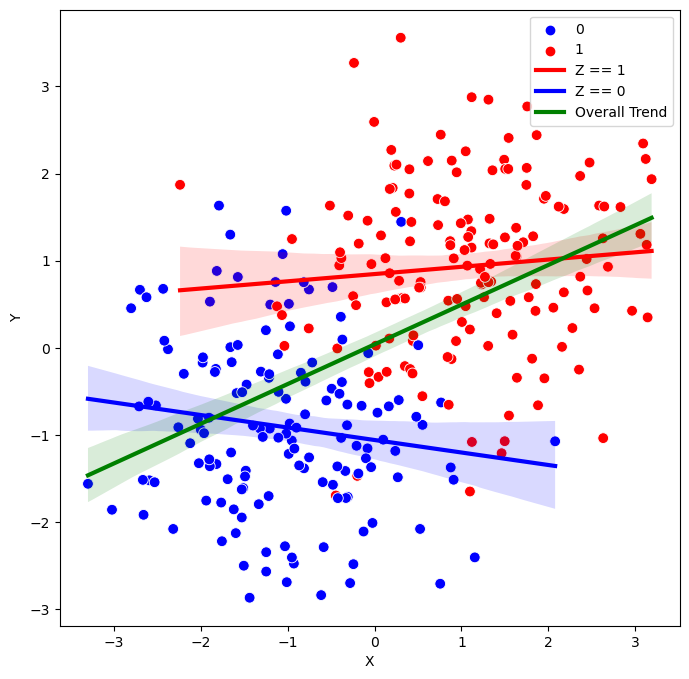

In [50]:
from scipy.stats import bernoulli

n = 300
np.random.seed(42)

data = pd.DataFrame()

# Generate Z from a Bernoulli distribution with probability 0.5
Z = bernoulli.rvs(0.5, size=n)
data["Z"] = Z

# Generate X based on the values of Z
data["X"] = np.random.normal(size=n, loc=2*Z-1)

# Generate Y based on the values of Z
data["Y"] = np.random.normal(size=n, loc=2*Z-1)

corr = data.corr(method="pearson").abs()
print(f"Correlation between X and Y: {corr['X']['Y']: 0.3f}")

corr = data[data['Z'] == 0].corr().abs()
print(f"Correlation between X and Y when Z is 0: {corr['X']['Y']: 0.3f}")

corr = data[data['Z'] == 1].corr().abs()
print(f"Correlation between X and Y when Z is 1: {corr['X']['Y'] : 0.3f}")

plt.figure(figsize=(8, 8))
palette = {0: 'blue', 1: 'red'}
sns.scatterplot(x='X', y='Y', hue='Z', data=data, palette=palette, s=60)

sns.regplot(data=data[data['Z'] == 1], x='X', y='Y', scatter=False, color='red', line_kws={'linewidth': 3}, label='Z == 1')
sns.regplot(data=data[data['Z'] == 0], x='X', y='Y', scatter=False, color='blue', line_kws={'linewidth': 3}, label='Z == 0')
sns.regplot(data=data, x='X', y='Y', scatter=False, color='green', line_kws={'linewidth': 3}, label='Overall Trend')

plt.legend()
plt.show()


# Waffle Divorce

In [53]:
waffle = pd.read_csv("../data/WaffleDivorce.csv", sep=";")
waffle.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


<img src="images/image17.jpeg" width="600" height="400" />

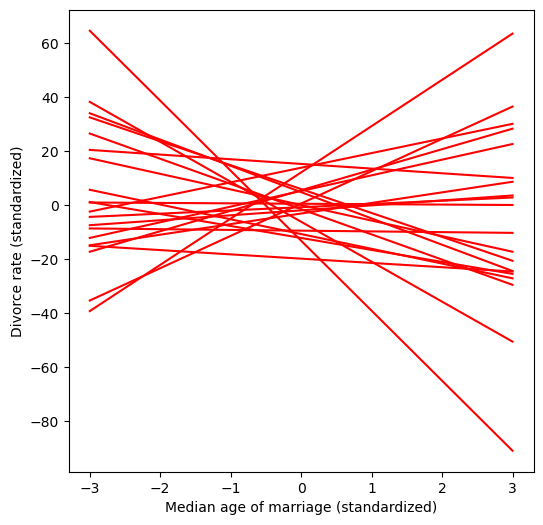

In [64]:
n = 20

a = np.random.normal(size=n, loc=0, scale=10)
bM = np.random.normal(size=n, loc=0, scale=10)
bA = np.random.normal(size=n, loc=0, scale=10)

A_seq = np.linspace(start=-3, stop=3, num=30)

plt.figure(figsize=(6, 6))

for i in range(n):
    mu = a[i] + bA[i] * A_seq
    plt.plot(A_seq, mu, color='red')
    
plt.xlabel("Median age of marriage (standardized)")
plt.ylabel("Divorce rate (standardized)")
plt.show()

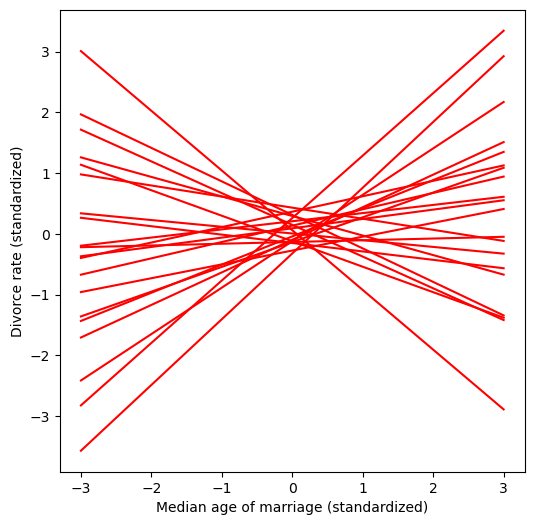

In [65]:
n = 20

a = np.random.normal(size=n, loc=0, scale=0.2)
bM = np.random.normal(size=n, loc=0, scale=0.5)
bA = np.random.normal(size=n, loc=0, scale=0.5)

A_seq = np.linspace(start=-3, stop=3, num=30)

plt.figure(figsize=(6, 6))

for i in range(n):
    mu = a[i] + bA[i] * A_seq
    plt.plot(A_seq, mu, color='red')
    
plt.xlabel("Median age of marriage (standardized)")
plt.ylabel("Divorce rate (standardized)")
plt.show()

<img src="images/image20.jpeg" width="800" height="500" />

In [66]:
waffle.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [69]:
def standardize(arr):
    arr = (arr - arr.mean()) / arr.std()
    return arr

D = standardize(waffle["Divorce"])
M = standardize(waffle["Marriage"])
A = standardize(waffle["MedianAgeMarriage"])

with pm.Model() as model:
    sigma = pm.Exponential('sigma', lam=1)
    bA = pm.Normal('bA', mu=0, sigma=0.5)
    bM = pm.Normal('bM', mu=0, sigma=0.5)
    a = pm.Normal('a', mu=0, sigma=0.2)
    
    mu = a + bM*M + bA*A
    
    m_DMA = pm.Normal('m_DMA', mu=mu, sigma=sigma, observed=D)
    trace = pm.sample(nuts_sampler="numpyro", return_inferencedata=True)
    
pm.summary(trace).round(2)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.00,0.10,-0.19,0.19,0.0,0.0,3790.0,2659.0,1.0
bA,-0.60,0.16,-0.89,-0.30,0.0,0.0,2858.0,2857.0,1.0
bM,-0.05,0.15,-0.35,0.23,0.0,0.0,2872.0,2604.0,1.0
sigma,0.83,0.09,0.67,0.99,0.0,0.0,3804.0,2627.0,1.0


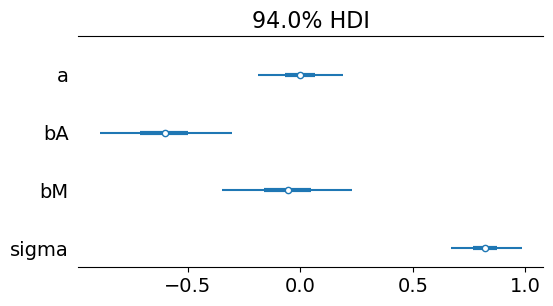

In [81]:
import arviz as az

az.plot_forest(trace, kind='forestplot', combined=True, figsize=(6, 3))
plt.show()

#### Summary Table and Forest Plot

- **Intercept (\( \alpha \))**: This is centered on zero due to the standardization process.
- **Slopes (\( \beta_M \) and \( \beta_A \))**: These are the key parameters for our analysis, representing the effects of marriage rate and age at marriage, respectively.

The forest plot (or caterpillar plot) displays:
- **Posterior Means**: Represented by open circles for each parameter. These are the average estimates of the parameters based on the posterior distribution.
- **89% Percentile Intervals**: The bars indicating the range within which 89% of the posterior distribution lies. These are also known as compatibility intervals or credible intervals.

<img src="images/image21.jpeg" width="800" height="500" />

#### Interpretation of Parameters

- **Intercept (\( \alpha \))**: As expected, it is centered on zero due to the transformation applied during standardization. This is a direct result of how we standardized our variables.
- **Slope for Marriage Rate (\( \beta_M \))**: This parameter is close to zero and its interval spans both sides of zero.
  - The interval including zero does not mean the causal effect is zero. It indicates that the effect could be slightly positive or slightly negative.
  - The presence of zero within this interval suggests that we cannot definitively conclude whether the effect of marriage rate on divorce rate is positive or negative without more data or further analysis.
- **Slope for Age at Marriage (\( \beta_A \))**: This parameter is quite negative and its interval does not include zero, indicating a strong and significant negative effect.
  - The certainty around this effect is higher compared to \( \beta_M \), suggesting that age at marriage has a more definitive impact on divorce rates.

#### Understanding Compatibility Intervals

- **Interval Including Zero**: This does not imply that the effect is zero. The fact that zero lies within the interval means the effect could plausibly be zero, but it could also be slightly positive or negative.
  - Zero is not a special point that negates all other values; it merely signifies that the exact effect could not be pinpointed with high certainty given the data.
  - The interval provides a range of plausible values for the effect, with zero being just one of them.

#### Causal Effect of Marriage Rate

- **Reporting Slopes**: While it is common to report the slope as the causal effect of \( M \) (marriage rate), this is not entirely accurate.
  - In simple linear models, the slope might closely estimate the causal effect, but this is not guaranteed in more complex or non-linear models.
  - The causal effect we are interested in (the estimand) is not solely a function of a single parameter. It is influenced by the entire structure of the model and the interplay of multiple parameters.
  - For accurate causal inference, we must consider the entire posterior distribution and how all parameters interact.